# Обработка данных по резервам

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

%matplotlib inline

In [2]:
data = {
    'air_reserve': pd.read_csv('dataset/air_reserve.csv'),
    'hpg_reserve': pd.read_csv('dataset/hpg_reserve.csv'),
}

### Формируем `reserve_all`

 Объединяем `air_reserve` и `hpg_reserve`

In [3]:
columns = ['visit_datetime', 'reserve_visitors']
data['reserve_all'] = pd.concat([data['air_reserve'][columns], data['hpg_reserve'][columns]])

In [4]:
print('reserve_all', data['reserve_all'].shape)

reserve_all (2092698, 2)


Объединяем записи в `reserve`

In [5]:
data['reserve_all']['visit_datetime'] = pd.to_datetime(data['reserve_all']['visit_datetime'])
data['reserve_all']['visit_date']     = data['reserve_all']['visit_datetime'].dt.strftime('%Y-%m-%d')

data['reserve_all'] = data['reserve_all'].groupby(['visit_date'], as_index=False)[['reserve_visitors']].sum()

data['reserve_all'] = data['reserve_all'].rename(columns={
    'reserve_visitors': 'reserve_visitors_all',
})

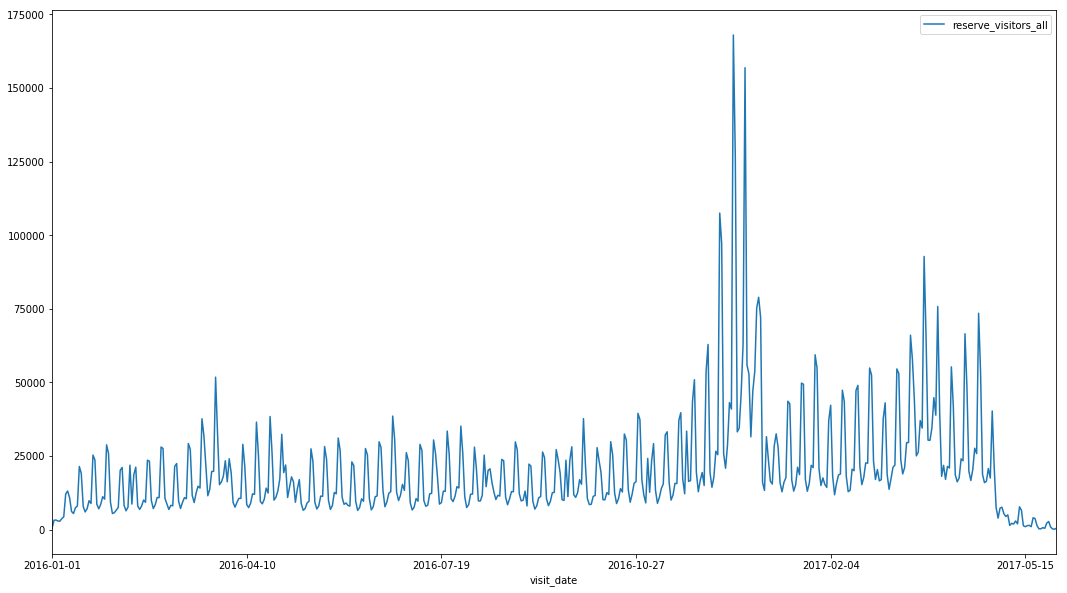

In [6]:
data['reserve_all'].set_index('visit_date').plot(figsize=(18,10))
pyplot.show()

In [7]:
data['reserve_all'].to_csv('result/reserve_all.csv', index=False)